## 0. Code Library and Links

In [70]:
import cv2 
import common
# import video 
import numpy as np 

import matplotlib.pylab as plt
from matplotlib import cm
import pylab 
%matplotlib inline

## Image Data

Image size 47817
Image shape (99, 161, 3)
Image type uint8


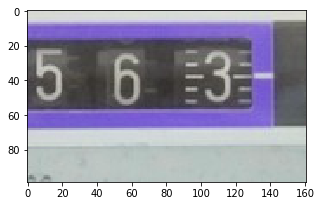

In [71]:
pylab.rcParams['figure.figsize'] = (5, 5)
input_image = cv2.imread('new/10.png')

print ('Image size', input_image.size)
print ('Image shape', input_image.shape)
print ('Image type', input_image.dtype)

plt.imshow(input_image);

In [77]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print (COLORflags[:50])

['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_COOL', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_JET', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_WINTER', 'COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS'

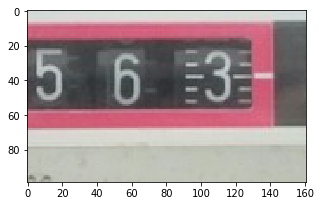

In [73]:
flag_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(flag_image);

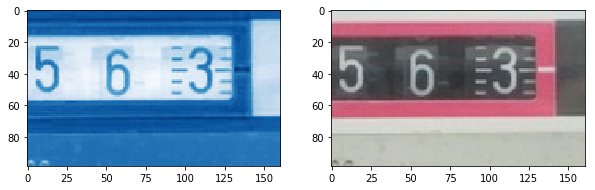

In [74]:
pylab.rcParams['figure.figsize'] = (10, 5)
# split channels
b, g, r = cv2.split(flag_image)
# merge channels
merged_image = cv2.merge([b, g, r])
# display one of the channels
plt.figure(1)
plt.subplot(121)
plt.imshow(b, cmap=cm.Blues);
# display merged image
plt.subplot(122)
plt.imshow(merged_image);

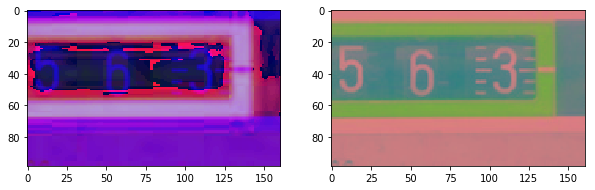

In [75]:
hsv_image = cv2.cvtColor(flag_image,cv2.COLOR_BGR2HSV_FULL)
lab_image = cv2.cvtColor(flag_image, cv2.COLOR_BGR2LAB)

plt.figure(1)
plt.subplot(121)
plt.imshow(hsv_image, cmap=cm.Blues);

plt.subplot(122)
plt.imshow(lab_image);

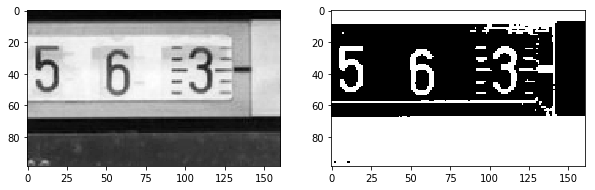

In [76]:
gray_image = cv2.cvtColor(flag_image,cv2.COLOR_BGR2GRAY)
ret, thresh_image = cv2.threshold(gray_image, 125, 250, cv2.THRESH_BINARY_INV)

plt.figure(1)
plt.subplot(121)
plt.imshow(gray_image, cmap=cm.Greys);

plt.subplot(122)
plt.imshow(thresh_image, cmap=cm.Greys);